In [0]:
from __future__ import absolute_import, division, print_function

In [2]:
#importing tensorflow
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [0]:
##Preprocess the data

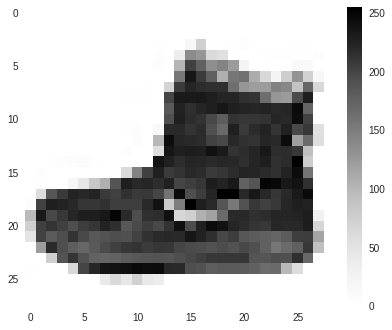

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0   # this allows us to scale the images from 0 to 1

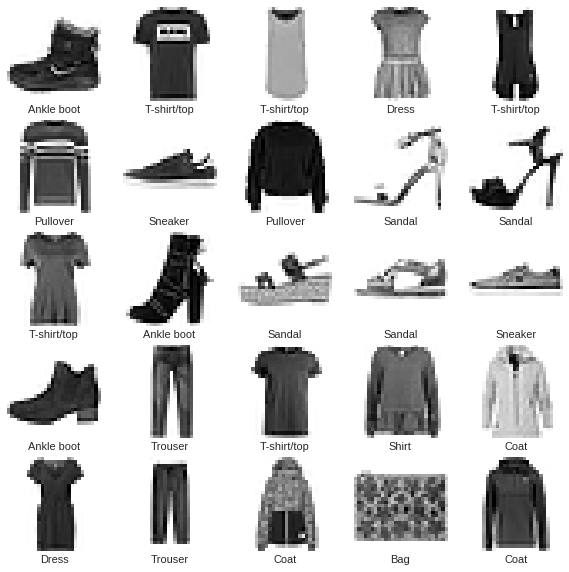

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#Model Building

#setting up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
# training the model

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 1.0878 - acc: 0.6600
Epoch 2/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.6344 - acc: 0.7712
Epoch 3/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5564 - acc: 0.8004
Epoch 4/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.5149 - acc: 0.8173
Epoch 5/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4882 - acc: 0.8267


In [32]:
# Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test_accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.5055 - acc: 0.8199
Test_accuracy: 0.8199


In [0]:
predictions = model.predict(test_images)

In [34]:
predictions[0]

array([4.7065587e-06, 9.6828593e-08, 1.0058542e-05, 1.0826112e-05,
       2.1143966e-05, 1.6731834e-01, 4.4090342e-05, 4.1154671e-01,
       7.5923549e-03, 4.1345167e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
# lets  look at the 0th image, predictions and prediction array

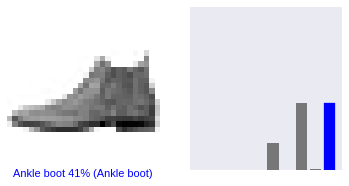

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

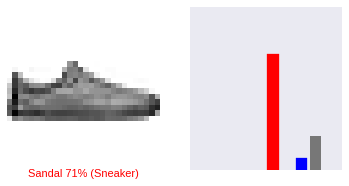

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

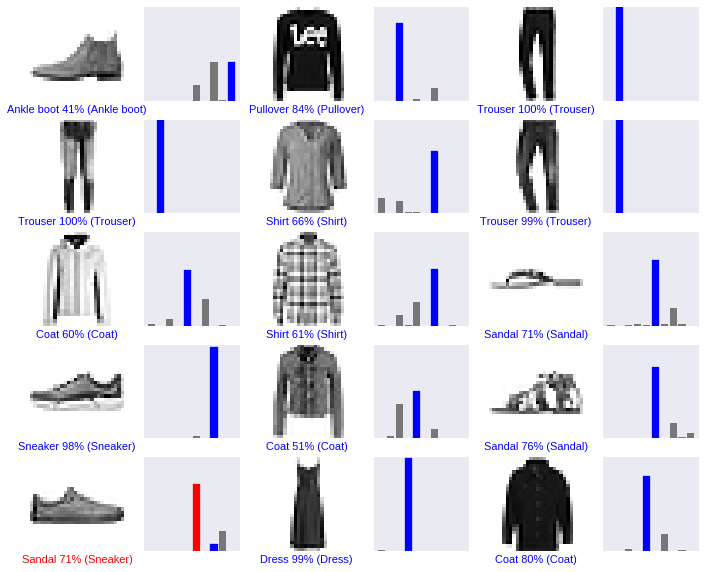

In [41]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [42]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.7065641e-06 9.6828806e-08 1.0058536e-05 1.0826115e-05 2.1143951e-05
  1.6731824e-01 4.4090437e-05 4.1154662e-01 7.5923563e-03 4.1345179e-01]]


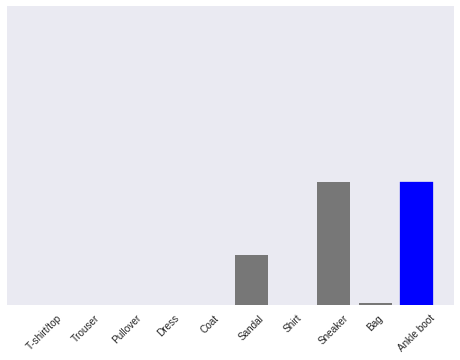

In [47]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [48]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
